In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Input, Embedding, Flatten, Dot, Dense,Dropout
from keras.models import Model
from keras.models import load_model
import os
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [ ]:
ratings=pd.read_csv('./drive/My Drive/data/ratings.csv')
mov=pd.read_csv('./drive/My Drive/data/movies.csv')
ratings=ratings.drop(['timestamp'],axis=1)
ratings=ratings.head(10000)
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
# users_num=len(ratings.userId.unique())
# movies_num=len(ratings.movieId.unique())
movies_num=max(ratings.movieId)
users_num=max(ratings.userId)
print(users_num)
print(movies_num)
train, test = train_test_split(ratings, test_size=0.2, random_state=0)

66
190183


In [ ]:
# creating movies embedding
mov_input = Input(shape=(1,), name="movie-input")
mov_emb = Embedding(movies_num+1, 5,name="movie-embedding")(mov_input)
# mov_vec = Flatten(name="Flatten-movie")(mov_emb)


# creating user embedding
user_input = Input(shape=(1,), name="user-input")
user_emb= Embedding(users_num+1, 5, name="user-embedding")(user_input)
# user_vec = Flatten(name="flatten-users")(user_emb)

# performing dot product and creating model
out = Dot(name="Dot-Product", axes=1)([mov_emb, user_emb])
out=Flatten()(out)
out=Dropout(0.3)(out)
out=Dense(70,activation='relu')(out)
out=Dropout(0.75)(out)
out=Dense(1)(out)
model = Model([mov_input, user_input], out)
model.compile(Adam(0.001), loss='mean_squared_error')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
8000/8000 [==============================] - 3s 418us/step - loss: 6.4886
Epoch 2/5
8000/8000 [==============================] - 3s 359us/step - loss: 2.0417
Epoch 3/5
8000/8000 [==============================] - 3s 360us/step - loss: 2.0052
Epoch 4/5
8000/8000 [==============================] - 3s 358us/step - loss: 1.9252
Epoch 5/5
8000/8000 [==============================] - 3s 351us/step - loss: 1.8145


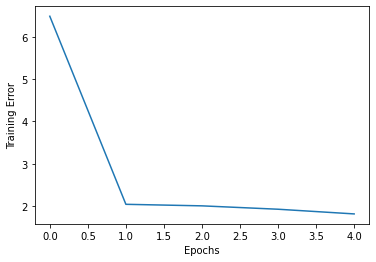

In [ ]:
if os.path.exists('recommender_model.h5'):
    model = load_model('recommender_model.h5')
else:
    his = model.fit([train.movieId, train.userId], train.rating, epochs=5)
    model.save('recommender_model.h5')
    plt.plot(his.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [ ]:
model.evaluate([test.movieId,test.userId], test.rating)


2000/2000 [==============================] - 0s 30us/step


1.1910011582374573

In [ ]:
predictions = model.predict([test.movieId.head(10),test.userId.head(10)])
for i in range(10):
  print('Predicted ratings',predictions[i])
  print('Actual ratings',test.rating.iloc[i])

Predicted ratings [3.0458627]
Actual ratings 4.5
Predicted ratings [3.0316334]
Actual ratings 4.0
Predicted ratings [2.9401164]
Actual ratings 3.0
Predicted ratings [2.8231902]
Actual ratings 4.0
Predicted ratings [3.2031922]
Actual ratings 2.0
Predicted ratings [3.1273105]
Actual ratings 5.0
Predicted ratings [3.6207738]
Actual ratings 4.0
Predicted ratings [3.0001912]
Actual ratings 5.0
Predicted ratings [3.113244]
Actual ratings 3.0
Predicted ratings [3.1234255]
Actual ratings 4.5


In [ ]:
# Extract embeddings
movie_emb = model.get_layer('movie-embedding')
movie_weights = movie_emb.get_weights()[0]
movie_weights[:5]

array([[-0.02816255, -0.04737374, -0.0377884 ,  0.02045107,  0.01303465],
       [-0.483418  ,  0.38071084,  0.49641317, -0.4176225 ,  0.14854543],
       [-0.15826337,  0.20395742,  0.3026877 , -0.2151654 ,  0.12527268],
       [-0.28392646,  0.22340849,  0.27802217, -0.15719907,  0.22286053],
       [-0.10309891,  0.03190279,  0.10115959, -0.09988984, -0.00818213]],
      dtype=float32)

In [ ]:
# Creating user and movies for recommendation
movies = np.array(list(set(ratings.movieId)))

user=[]
for i in range(len(movies)):
  user.append(1)
user=np.array(user)
predictions = model.predict([movies,user])

[     1 122882      3 ... 106487 106489 106491]


In [ ]:
# recommended top 5 movies are
pre_idx=predictions.argsort(axis=0)[::-1][:5]
for x in pre_idx:
    print(mov[mov.movieId==x[0]]['title'])



219    Jerky Boys, The (1995)
Name: title, dtype: object
406    Englishman Who Went Up a Hill But Came Down a ...
Name: title, dtype: object
202    French Kiss (1995)
Name: title, dtype: object
175    Walk in the Clouds, A (1995)
Name: title, dtype: object
637    Kazaam (1996)
Name: title, dtype: object
